In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import *

In [2]:
train = pd.read_json('input/train.json', orient='records')
train.inc_angle = train.inc_angle.replace('na',0)
train.head()
#Preprocessing(df_SAR,train = True,color_space = 'HSV')

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [3]:
train_filtered, new_angle, new_y = Preprocessing(train,train = True,color_space = 'HSV')

/Users/jessie/Desktop/EE542/Iceberg/utils.py:138: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  chosen_ships = np.random.choice(ships, np.around(ships.shape[0]*percent))
/Users/jessie/Desktop/EE542/Iceberg/utils.py:140: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  chosen_icebergs = np.random.choice(icebergs, np.around(icebergs.shape[0]*percent))


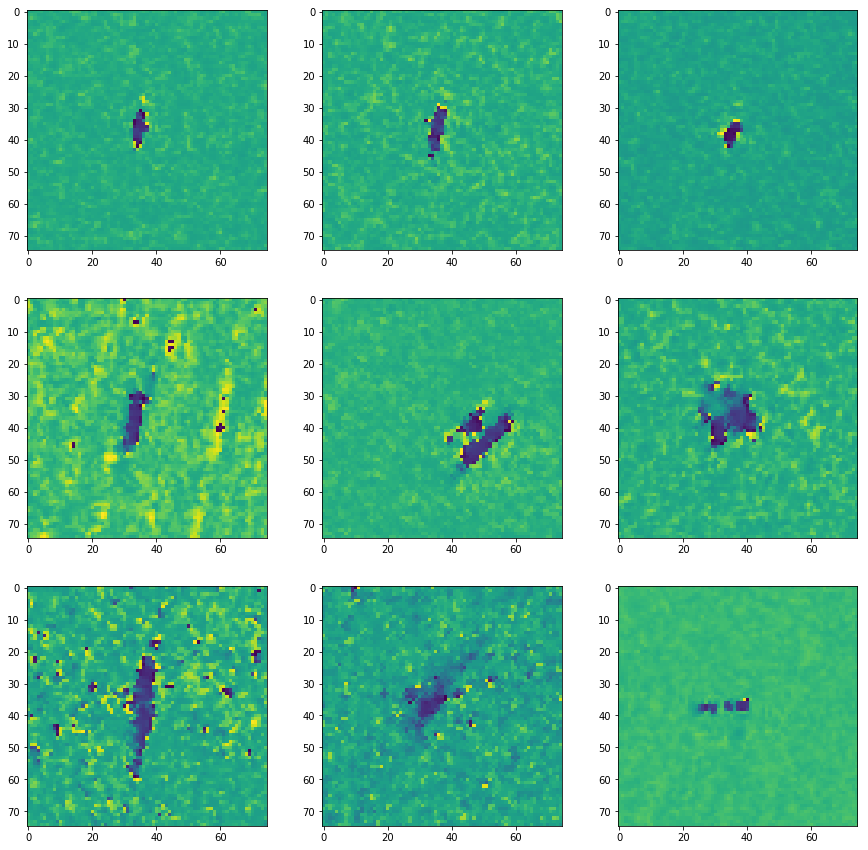

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    arr = train_filtered[i*10, :, :, 0]
    ax.imshow(arr)   
plt.show()

In [5]:
from cnn_build import *

X_train, X_valid, X_angle_train, X_angle_valid, y_train, y_valid = train_test_split(train_filtered,
                                    new_angle, new_y, random_state=666, train_size=0.75)
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=10) # do 10 more rounds after stopping condition

Using TensorFlow backend.
/Users/jessie/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
model=getModel()
model.fit(X_train,y_train,
          batch_size=24,
          epochs=50,
          verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       73856     
__________

In [7]:
model.load_weights(filepath=file_path)
score = model.evaluate(X_valid, y_valid, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

602/602 [==============================] - 2s 4ms/step
Test loss: 0.387008946104
Test accuracy: 0.81063122983
